In [423]:
# Linear Regression
import numpy as np
class linearRegression(object):
    def __init__(self):
        pass
    def load_csv(self, path, delimiter):
        # load data
        print("loading data...\n")
        data = np.loadtxt(path, dtype=np.str, delimiter=delimiter)
        
        # set feature from str to float64
        feature = data[:, :-1].astype(np.float64)
        
        label = data[:, -1]
        
#         print(feature, label)
        label = self.oneHotEncoding(label)
        return feature, label
    
    def oneHotEncoding(self, y):
        # number of classes type
        classes = len(set(y))
        
        # format the target into 1-dimention
        targets = np.array(y).reshape(-1)
        
        # replace the numerated type by number
        for i in range(classes):
            targets[targets == list(set(targets))[i]] = i
            
        # change type to int
        targets = targets.astype(np.int)
        
        # test
        # print(np.eye(classes)[2])
        
        # get one-hot matrix
        one_hot_targets = np.eye(classes)[targets]
        return one_hot_targets
    
    def leastSquares(self, X, y): 
        # using the fact that \theta = (X^T X)^(-1)X^T y
        # set X_0 = 1
        one = np.ones(y.shape[0])
        X = np.c_[one, X]
        theta = np.ones(X.shape[1])
        parameter = np.dot(np.dot(np.matrix(np.dot(X.T, X)).I, X.T), y)
        return parameter
    
    def k_fold(self, X, y, K):
        """
        Step1:  将学习样本空间 C 分为大小相等的 K 份  
        Step2:  for i = 1 to K ：
                    取第i份作为测试集
                    for j = 1 to K:
                        if i != j:
                            将第j份加到训练集中，作为训练集的一部分
                        end if
                    end for
                end for
        Step3:  for i in (K-1训练集)：
                    训练第i个训练集，得到一个分类模型
                    使用该模型在第N个数据集上测试，计算并保存模型评估指标
                end for
        Step4:  计算模型的平均性能
        Step5:  用这K个模型在最终验证集的分类准确率平均值作为此K-CV下分类器的性能指标.
        """
        # Scramble the order of the data
        rand = np.random.RandomState(0)
        permutation = rand.permutation(X.shape[0])
        X, y = X[permutation], y[permutation]
        
        # Divide the data set into k parts.
#         each = 0
#         if ((X.shape[0]/K - X.shape[0]//K)>0):
#             each = int(X.shape[0]/K + 1)
#         else:
        each = int(X.shape[0]/K)
            
        accu = []
        # training K times
        for i in range(K):
            t = [j for j in range(y.shape[0])]
#             testIdx = np.array([j+i*each for j in range(each)])
            testIdx = np.array(t[0 + i*each: each + i*each])
            if (y.shape[0]-1 - testIdx[-1] < each):
                testIdx = np.array(t[i*each:])
            testIdx = testIdx[testIdx<X.shape[0]]
            trainIdx = np.array([True]*X.shape[0])
            trainIdx[testIdx] = False
            train_X = X[trainIdx]
            train_y = y[trainIdx]
            test_X = X[testIdx]
            test_y = y[testIdx]
            parameter = self.leastSquares(train_X, train_y)
            
            # predict
            # set X_0 = 1
            one = np.ones(test_X.shape[0])
            test_X = np.c_[one, test_X]
#             print(parameter)
#             print(test_X) 
            yx = np.dot(test_X, parameter)
#             print(yx)
            pre = np.where(yx==np.max(yx,axis=1))[1]
#             print(pre)
            one_hot_pre = np.eye(test_y.shape[1])[pre]
#             print(one_hot_pre==test_y)
            
            p = 0
            for k in range(test_X.shape[0]):
#                 print(one_hot_pre[k] , test_y[k])
                if ((one_hot_pre[k] == test_y[k]).all()):
                    p += 1
            accu.append(p/test_y.shape[0])
        print("Divide into ", K, " parts.", "The accurate is : ", sum(accu)/K)
    
    def SGD(self, X, y, step, max_iter_cnt):
        
        one = np.ones(y.shape[0])
        X = np.c_[one, X]
        m = X.shape[0]
        iter_cnt = 0
#         theta = np.zeros((5, 3))
        theta = np.ones((5, 3))
        iter_theta = []
        
        loss = 1
        
        while (iter_cnt < max_iter_cnt):
            
            iter_theta.append(theta)
            
            # random select a data
            rand = np.random.randint(0,m,1)
            print((np.dot(theta.T, X[rand].T) - y[rand].T).shape, X[rand].shape)
            partialDerivitive = step*(np.dot(theta.T, X[rand].T) - y[rand].T)*X[rand]
            theta = theta - partialDerivitive.T
            iter_cnt += 1
        return theta
    
    def BGD(self, X, y, step, max_iter_cnt):
        
        one = np.ones(y.shape[0])
        X = np.c_[one, X]
        m = X.shape[0]
        iter_cnt = 0
#         theta = np.zeros((5, 3))
        theta = np.ones((5, 3))
        iter_theta = []
                
        while (iter_cnt < max_iter_cnt):
            iter_theta.append(theta)
            print(theta.T.shape, X[rand].T.shape)
            partialDerivitive = step*(np.dot(theta.T, X[rand].T) - y[rand].T)*X[rand]
            theta = theta - partialDerivitive.T
        
            iter_cnt += 1
        return theta

    def k_fold2(self, X, y, K):
        # Scramble the order of the data
        rand = np.random.RandomState(0)
        permutation = rand.permutation(X.shape[0])
        X, y = X[permutation], y[permutation]
        
        # Divide the data set into k parts.
#         each = 0
#         if ((X.shape[0]/K - X.shape[0]//K)>0):
#             each = int(X.shape[0]/K + 1)
#         else:
        each = int(X.shape[0]/K)
            
        accu = []
        # training K times
        for i in range(K):
            t = [j for j in range(y.shape[0])]
#             testIdx = np.array([j+i*each for j in range(each)])
            testIdx = np.array(t[0 + i*each: each + i*each])
            if (y.shape[0]-1 - testIdx[-1] < each):
                testIdx = np.array(t[i*each:])
            trainIdx = np.array([True]*X.shape[0])
            trainIdx[testIdx] = False
            train_X = X[trainIdx]
            train_y = y[trainIdx]
            test_X = X[testIdx]
            test_y = y[testIdx]
            
            parameter = self.SGD(train_X, train_y, 0.0000001, 1000)
            
            # predict
            # set X_0 = 1
            # add 1 to X
            one = np.ones(test_X.shape[0])
            test_X = np.c_[one, test_X]
            
            yx = np.dot(test_X, parameter)
            pre = np.argmax(yx,axis=1)
#             print(pre)
            one_hot_pre = np.eye(test_y.shape[1])[pre]
#             print(one_hot_pre==test_y)
    
            p = 0
            for k in range(test_X.shape[0]):
#                 print(one_hot_pre[k] , test_y[k])
                if ((one_hot_pre[k] == test_y[k]).all()):
                    p += 1
            accu.append(p/test_y.shape[0])
            print(i, "-th part accurate :", p/test_y.shape[0])
        print("Divide into ", K, " parts.", "The accurate is : ", sum(accu)/K )
    
    
    def run(self):
        feature, label = self.load_csv("Iris.csv", ",")
#         self.leastSquares(feature, label)
#         for i in range(2, 11, 2):
#             self.k_fold(feature, label, i)
        
        print("Using optimization funtion Stochastic Gradiant Descent:")
        for i in range(2, 5, 2):
            self.k_fold2(feature, label, i)
    
"""
Attribute Information:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica
"""
linearRegression = linearRegression()
linearRegression.run()

loading data...

Using optimization funtion Stochastic Gradiant Descent:
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3,

(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1)

(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1)

(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1)

(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1)

(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
1 -th part accurate : 0.40540540540540543
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1)

(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1)

(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1) (1, 5)
(3, 1)

In [464]:
# Linear Regression
import numpy as np
class linearRegression(object):
    def __init__(self):
        pass
    def load_csv(self, path, delimiter):
        # load data
        print("loading data...\n")
        data = np.loadtxt(path, dtype=np.str, delimiter=delimiter)
        
        # set feature from str to float64
        feature = data[:, :-1].astype(np.float64)
        
        label = data[:, -1]
        
#         print(feature, label)
        label = self.oneHotEncoding(label)
        return feature, label
    
    def oneHotEncoding(self, y):
        # number of classes type
        classes = len(set(y))
        
        # format the target into 1-dimention
        targets = np.array(y).reshape(-1)
        
        # replace the numerated type by number
        for i in range(classes):
            targets[targets == list(set(targets))[i]] = i
            
        # change type to int
        targets = targets.astype(np.int64)
        
        # test
        # print(np.eye(classes)[2])
        
        # get one-hot matrix
        one_hot_targets = np.eye(classes)[targets]
        return one_hot_targets
    
    def lscombinesgd(self, X, y, step, max_iter_cnt):
        para = self.leastSquares(X, y)
        parameter = self.SGD(X, y, step, max_iter_cnt, para)
        return parameter
    
    def leastSquares(self, X, y): 
        # using the fact that \theta = (X^T X)^(-1)X^T y
        # set X_0 = 1
        one = np.ones(y.shape[0])
        X = np.c_[one, X]
        theta = np.ones(X.shape[1])
        parameter = np.dot(np.dot(np.matrix(np.dot(X.T, X)).I, X.T), y)
        return parameter
    
    
    def SGD(self, X, y, step, max_iter_cnt, theta = np.zeros((5, 3))):
        
        one = np.ones(y.shape[0])
        X = np.c_[one, X]
        m = X.shape[0]
        iter_cnt = 0
#         theta = np.zeros((5, 3))
#         theta = np.ones((5, 3))
        theta = np.array([[10, 3, 5],[8, 2, 5],[1, 5, 3],[2, 7, 5],[1, 2, 0]])
        iter_theta = []
        
        
        while (iter_cnt < max_iter_cnt):
            
            iter_theta.append(theta)
            
            # random select a data
            for rand in range(m):
                partialDerivitive = step*(np.dot(theta.T, X[rand].T) - y[rand].T).reshape((3, 1)) * X[rand].reshape((1, 5))
                theta = theta - partialDerivitive.T
            iter_cnt += 1
        return theta
    
    def BGD(self, X, y, step, max_iter_cnt):
        
        one = np.ones(y.shape[0])
        X = np.c_[one, X]
        m = X.shape[0]
        iter_cnt = 0
        theta = np.ones((5, 3))
        allSum = np.zeros((5, 3))
        iter_theta = []
                
        while (iter_cnt < max_iter_cnt):
            iter_theta.append(theta)
            for i in range(m):
                allSum += ((np.dot(theta.T, X[i].T) - y[i].T).reshape((3, 1)) * X[i].reshape((1, 5))).T
            theta = theta - step*allSum
            iter_cnt += 1
        return theta

    def k_fold2(self, X, y, K):
        # Scramble the order of the data
        rand = np.random.RandomState(0)
        permutation = rand.permutation(X.shape[0])
        X, y = X[permutation], y[permutation]
        
        # Divide the data set into k parts.
#         each = 0
#         if ((X.shape[0]/K - X.shape[0]//K)>0):
#             each = int(X.shape[0]/K + 1)
#         else:
        each = int(X.shape[0]/K)
            
        accu = []
        # training K times
        for i in range(K):
            t = [j for j in range(y.shape[0])]
#             testIdx = np.array([j+i*each for j in range(each)])
            testIdx = np.array(t[0 + i*each: each + i*each])
            if (y.shape[0]-1 - testIdx[-1] < each):
                testIdx = np.array(t[i*each:])
            trainIdx = np.array([True]*X.shape[0])
            trainIdx[testIdx] = False
            train_X = X[trainIdx]
            train_y = y[trainIdx]
            test_X = X[testIdx]
            test_y = y[testIdx]
            
            parameter = self.SGD(train_X, train_y, 0.001, 1400)
#             parameter = self.leastSquares(train_X, train_y)
#             parameter = self.lscombinesgd(train_X, train_y, 0.001, 1400)
            # predict
            # set X_0 = 1
            # add 1 to X
            one = np.ones(test_X.shape[0])
            test_X = np.c_[one, test_X]
            
            yx = np.dot(test_X, parameter)
            pre = np.argmax(yx,axis=1)
#             print(pre)
            one_hot_pre = np.eye(test_y.shape[1])[pre]
#             print(one_hot_pre==test_y)
    
            p = 0
            for k in range(test_X.shape[0]):
#                 print(one_hot_pre[k] , test_y[k])
                if ((one_hot_pre[k] == test_y[k]).all()):
                    p += 1
            accu.append(p/test_y.shape[0])
            print(i, "-th part accurate :", p/test_y.shape[0])
        print("Divide into ", K, " parts.", "The accurate is : ", sum(accu)/K )
    
    
    def run(self):
        feature, label = self.load_csv("Iris.csv", ",")
#         self.leastSquares(feature, label)
#         for i in range(2, 11, 2):
#             self.k_fold(feature, label, i)
        
        print("Using optimization funtion Stochastic Gradiant Descent:")
        for i in range(2, 11, 2):
            self.k_fold2(feature, label, i)
    
"""
Attribute Information:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica
"""
linearRegression = linearRegression()
linearRegression.run()

loading data...

Using optimization funtion Stochastic Gradiant Descent:
0 -th part accurate : 0.7466666666666667
1 -th part accurate : 0.9333333333333333
Divide into  2  parts. The accurate is :  0.8400000000000001
0 -th part accurate : 0.8918918918918919
1 -th part accurate : 0.7027027027027027
2 -th part accurate : 0.8918918918918919
3 -th part accurate : 0.8717948717948718
Divide into  4  parts. The accurate is :  0.8395703395703397
0 -th part accurate : 0.84
1 -th part accurate : 0.84
2 -th part accurate : 0.68
3 -th part accurate : 0.88
4 -th part accurate : 0.88
5 -th part accurate : 0.8
Divide into  6  parts. The accurate is :  0.82
0 -th part accurate : 0.7777777777777778
1 -th part accurate : 0.8888888888888888
2 -th part accurate : 0.7777777777777778
3 -th part accurate : 0.6666666666666666
4 -th part accurate : 0.9444444444444444
5 -th part accurate : 0.8888888888888888
6 -th part accurate : 0.8333333333333334
7 -th part accurate : 0.7916666666666666
Divide into  8  parts. 

In [62]:
np.array([int(i == 5) for i in range(10)])
import numpy as np
nb_classes = 6
targets = np.array([[2, 3, 4, 0]]).reshape(-1)
print(targets)
one_hot_targets = np.eye(nb_classes)[targets]
print(one_hot_targets)

[2 3 4 0]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [285]:
import numpy as np
a = np.array([[1, 5, 5, 2],
              [9, 6, 2, 8],
              [3, 7, 9, 1]])
print(np.argmax(a, axis=0))

[1 2 2 1]


### Machine Learning Assignment1

In [467]:
#K-NN
import math
class KNN:
    def __init__(self, ipt, train, k):
        self.ipt = ipt
        self.train = train
        self.k = k
    def knn_classify(self, ipt, train, k):
        cnt = 0
        feature = [feat[0] for feat in self.train]
        label = [lbl[1] for lbl in self.train]
        distance = self.distance(ipt, feature)
        con = zip(distance, label)
        distance = sorted(con, key = lambda x:x[0])
        topk = distance[:k]
        for i in topk:
            if i[1] == "W":
                cnt += 1
        if cnt/k > 0.5:
            return "W"
        return "M"
    
    def distance(self, ipt, feature):
        diff = []
        for feat in feature:
            diff.append(sum([pow((ipt[i]-feat[i]), 2) for i in range(len(ipt))]))
        diff = list(map(lambda x:math.sqrt(x), diff))
        return diff
            
    
    def run(self):
        classes = self.knn_classify(self.ipt, self.train, self.k)
        return classes
        
train = [[[170, 57, 32], 'W'], 
         [[192, 95, 28], 'M'], 
         [[150, 45, 30], 'W'], 
         [[170, 65, 29], 'M'], 
         [[175, 78, 35], 'M'], 
         [[185, 90, 32], 'M'], 
         [[170, 65, 28], 'W'], 
         [[155, 48, 31], 'W'], 
         [[160, 55, 30], 'W'], 
         [[182, 80, 30], 'M'], 
         [[175, 69, 28], 'W'], 
         [[180, 80, 27], 'M'], 
         [[160, 50, 31], 'W'],
         [[175, 72, 30], 'M']]

test = [[155, 40, 35], [170, 70, 32], [175, 70, 35], [180, 90, 20]]
print("Use KNN to predict: ")
for i in test:
    t = KNN(i, train, 1)
    classes = t.run()
    print(i, classes)
    
# a = int(input("how many test case: "))
# for j in range(a):
#     i = [int(x) for x in input().split()]
#     t = KNN(i, train, 1)
#     classes = t.run()
#     print(i, classes)

    
# python 2.4
# a = int(input("How many test case: "))
# k = int(input("Please set your K value(1~20): "))
# for j in range(a):
#     i = [int(x) for x in raw_input("input the test case split by space(example:170 57 32): ").split()]
#     t = KNN(i, train, k)
#     classes = t.run()
#     print("k = %d ,input = %s, classes = %s"%(k, i, classes) )

Use KNN to predict: 
[155, 40, 35] W
[170, 70, 32] M
[175, 70, 35] M
[180, 90, 20] M


In [472]:
#Gaussian Naive Bayes
import math
class GNB:
    def __init__(self, ipt, train):
        self.ipt = ipt
        self.train = train
    
    def gaussFunction(self, x, mu, squareOfSigma):
        p = (1/((2*3.14*squareOfSigma)**0.5))*math.exp(-(x-mu)**2/(2*squareOfSigma))
        return p
    
    def gaussianNaiveBayesClassifier(self, ipt, train):
        feature = [feat[0] for feat in self.train]
        label = [lbl[1] for lbl in self.train]
        setlabel = set(label)
        judgeDict = dict()
        for i in setlabel:
            judgeDict.setdefault(i, 1)
        
        labelp = dict()
        for i in label:
            labelp.setdefault(i, 0)
            labelp[i] += 1
            
        for i in setlabel:
            labelp[i] = labelp[i]/len(label)
        
        # calc mu and square of sigma
        GaussParaDict = self.calcGaussianPara(feature, label)
        
        # enum sex label
        for j in setlabel:
            # ipt is a single test set
            for i in range(len(ipt)):
#                 print("In Label ", j)
                p = self.gaussFunction(ipt[i], GaussParaDict[i][j][0], GaussParaDict[i][j][1])
#                 print("Number ", i, "-th Feature P = : ", p)    
                judgeDict[j] *= p
            judgeDict[j] *= labelp[j]
#         print("judgeDict =========> ", judgeDict)
#         print("It's Sex More Likely a :", max(judgeDict,key=judgeDict.get))
        result, tmp = 0, 0
        for i in judgeDict.keys():
            if judgeDict[i] > tmp:
                result = i
                tmp = judgeDict[i]
        print(result)
        return max(judgeDict,key=judgeDict.get)
        
    def calcGaussianPara(self, feature, label):
        # count the number of different types of labels
        labeldict = dict()
        for i in label:
            labeldict.setdefault(i, 0)
            labeldict[i] += 1
#         print(labeldict)
        
        # calculate mu and square of sigma
        mu, squareOfSigma = 0, 0
        featureNum = len(feature[0])
        featuredict = dict()
        for i in range(featureNum):
            featuredict.setdefault(i, {})
        
        for l in labeldict.keys():
            ll = list(filter(lambda x: x[1] == l, zip(feature, label)))
            tmp = [0] * featureNum
            for i in ll:
                tmp = list(map(lambda x:x[0]+x[1], list(zip(tmp, i[0]))))
            # tmp: each col sum
#             print("tmp", tmp)
#             print("ll", ll)
            
            mu = [k/labeldict[l] for k in tmp]
#             print("mu = ", mu)
            
            tmp2 = [0] * featureNum
            tmp3 = []
            
            for i in ll:
                # tmp3: each col minus square of mu
#                 print("zip(i[0], mu))", list(zip(i[0], mu)))
                tmp3 = [(k[0] - k[1]) ** 2 for k in zip(i[0], mu)]
#                 print(tmp3)
                # tmp2: each col's sum after minus square of mu
                tmp2 = list(map(lambda x:x[0]+x[1], list(zip(tmp2, tmp3))))

            squareOfSigma = [k/(labeldict[l]-1) for k in tmp2]
#             print("squareOfSigma", squareOfSigma)
            
            for k in range(len(mu)):
                featuredict[k].setdefault(l, [])
                # make sure first one is mu and second one is square of sigma
                featuredict[k][l].append(mu[k])
                featuredict[k][l].append(squareOfSigma[k])
#         print("featuredict = ", featuredict)
        return featuredict
            
        
    def run(self):
        print("################## Test : ", i, "#######################")
        return self.gaussianNaiveBayesClassifier(i, self.train)


train = [[[170, 57, 32], 'W'], 
         [[192, 95, 28], 'M'], 
         [[150, 45, 30], 'W'], 
         [[170, 65, 29], 'M'], 
         [[175, 78, 35], 'M'], 
         [[185, 90, 32], 'M'], 
         [[170, 65, 28], 'W'], 
         [[155, 48, 31], 'W'], 
         [[160, 55, 30], 'W'], 
         [[182, 80, 30], 'M'], 
         [[175, 69, 28], 'W'], 
         [[180, 80, 27], 'M'], 
         [[160, 50, 31], 'W'],
         [[175, 72, 30], 'M']]

train1 = [[[170, 57], 'W'], 
         [[192, 95], 'M'], 
         [[150, 45], 'W'], 
         [[170, 65], 'M'], 
         [[175, 78], 'M'], 
         [[185, 90], 'M'], 
         [[170, 65], 'W'], 
         [[155, 48], 'W'], 
         [[160, 55], 'W'], 
         [[182, 80], 'M'], 
         [[175, 69], 'W'], 
         [[180, 80], 'M'], 
         [[160, 50], 'W'],
         [[175, 72], 'M']]

# test = [[155, 40, 35], [170, 70, 32], [175, 70, 35], [180, 90, 20]]
# test1 = [[155, 40], [170, 70], [175, 70], [180, 90]]
# gnb = GNB(test1, train1)
# gnb.run()

print("Use Gaussian Naive Bayes")

a = int(input("how many test case: "))
for j in range(a):
    i = [int(x) for x in input().split()]
    gnb = GNB(i, train)
    predict = gnb.run()
    print(i, "It's Sex More Likely a :", predict)

Use Gaussian Naive Bayes
how many test case: 4
155 40 35
################## Test :  [155, 40, 35] #######################
W
[155, 40, 35] It's Sex More Likely a : W
170 70 32
################## Test :  [170, 70, 32] #######################
M
[170, 70, 32] It's Sex More Likely a : M
175 70 35
################## Test :  [175, 70, 35] #######################
M
[175, 70, 35] It's Sex More Likely a : M
180 90 20
################## Test :  [180, 90, 20] #######################
M
[180, 90, 20] It's Sex More Likely a : M


### Machine Learning Project1

loading train set...

loading test set...

1 -th order result: 
(100, 100, 3) (3, 1)


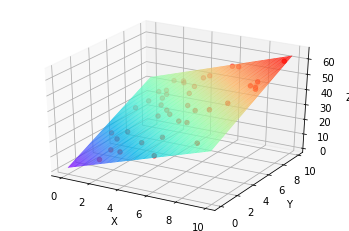

Reformat test feature to 1 -th order...
(40, 3) (3, 1)
SSE:  [[15.72427545]]
2 -th order result: 
(100, 100, 5) (5, 1)


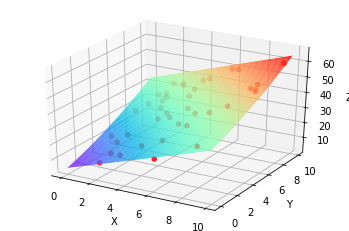

Reformat test feature to 2 -th order...
(40, 5) (5, 1)
SSE:  [[1.2042645]]
3 -th order result: 
(100, 100, 7) (7, 1)


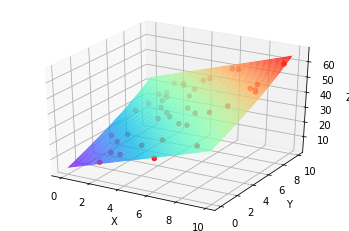

Reformat test feature to 3 -th order...
(40, 7) (7, 1)
SSE:  [[1.00877707]]
4 -th order result: 
(100, 100, 9) (9, 1)


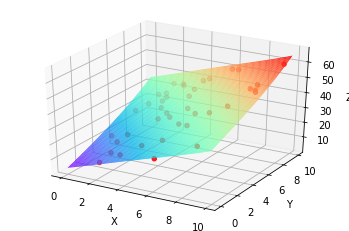

Reformat test feature to 4 -th order...
(40, 9) (9, 1)
SSE:  [[0.94529151]]
7 -th order result: 
(100, 100, 15) (15, 1)


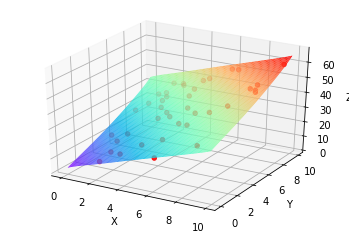

Reformat test feature to 7 -th order...
(40, 15) (15, 1)
SSE:  [[0.86923466]]


In [388]:
import numpy as np
import math
from matplotlib import pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D

class lr(object):
    
    def load_csv(self, path, delimiter, test_path):
        # load data
        print("loading train set...\n")
        data = np.loadtxt(path, dtype=np.str, delimiter=delimiter)
        
        # set feature from str to float64
        feature = np.array(data[:, :-1].astype(np.float64))
        label = np.array(data[:, -1]).astype(np.float64)
        print("loading test set...\n")
        test_data = np.loadtxt(test_path, dtype=np.str, delimiter=delimiter)
        # set feature from str to float64
        test_feature = np.array(data[:, :-1].astype(np.float64))
        test_label = np.array(data[:, -1]).astype(np.float64)
        return feature, label, test_feature, test_label
    
    def leastSquares(self, X, y, order): 
            # using the fact that \theta = (X^T X)^(-1)X^T y
            # set X_0 = 1
            orderX = []
            for i in X:
                tmp = []
                for j in i:
                    for k in range(1, order+1):
                        tmp.append(math.pow(j, k))
                orderX.append(tmp)
            orderX = np.array(orderX)
            one = np.ones(X.shape[0])
            orderX = np.c_[one, orderX]
            parameter = np.dot(np.dot(np.matrix(np.dot(orderX.T, orderX)).I, orderX.T), y)
            return orderX, y, parameter
    def show(self, feature, X, y, parameter, order):
#         print(parameter)
        order = order
        fig = plt.figure()  
#         ax = Axes3D(fig)
        ax = fig.add_subplot(111, projection='3d')
        # Generate regression surface
        x1 = np.arange(0, 10, 0.1)
        x2 = np.arange(0, 10, 0.1) 
        x1, x2 = np.meshgrid(x1, x2)
#         print(np.array((x1, x2)).shape) 2 100 100
        
        orderlist = []
        orderlist.append(np.ones((100, 100)))
        for i in (x1, x2):
            for j in range(1, order+1):
                orderlist.append(i**j)
        orderlist = np.array(orderlist)
        print(orderlist.T.shape, parameter.T.shape)
        z = orderlist.T*parameter.T
        # plot the surface
        ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='rainbow') 
        # plot the dot that document given.
        ax.scatter(feature[:, 0], feature[:, 1], y, c='r')
        ax.set_zlabel('Z')  # 坐标轴
        ax.set_ylabel('Y')
        ax.set_xlabel('X')
        plt.show()
    
    def evaluate(self, test_feature, test_label, parameter, order):
        print("Reformat test feature to", order, "-th order...")
        orderX = []
        for i in test_feature:
            tmp = []
            for j in i:
                for k in range(1, order+1):
                    tmp.append(math.pow(j, k))
            orderX.append(tmp)
        orderX = np.array(orderX)
        one = np.ones(test_feature.shape[0])
        orderX = np.c_[one, orderX]
#         print(orderX.shape, parameter.T.shape)
        predicty = orderX*parameter.T
        tmp = test_label.reshape((40, 1))-predicty
        SSE = tmp.T*tmp
        print("SSE: ", SSE)        
            
        
    def run(self):
        feature, label, test_feature, test_label = self.load_csv("project1.csv", ",", "project1_test.csv")
#         print(feature, label)
        for i in [1, 2, 3, 4, 7]:
            print(i, "-th order result: ")
            orderX, y, parameter = self.leastSquares(feature, label, i)
            self.show(feature, orderX, y, parameter, i)
            self.evaluate(test_feature, test_label, parameter, i)
        
        
lr = lr()
lr.run()

loading train set...

loading test set...

7 -th order result: 
(40, 2)
(40, 36)
(36, 100, 100) (1, 36)


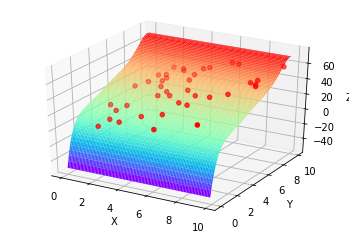

Reformat test feature to 7 -th order...
(40, 2)
(40, 36)
SSE:  [[1.19521239]]


In [204]:
import numpy as np
import math
from matplotlib import pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D

class lr(object):
    
    def load_csv(self, path, delimiter, test_path):
        # load data
        print("loading train set...\n")
        data = np.loadtxt(path, dtype=np.str, delimiter=delimiter)
        
        # set feature from str to float64
        feature = np.array(data[:, :-1].astype(np.float64))
        label = np.array(data[:, -1]).astype(np.float64)
        print("loading test set...\n")
        test_data = np.loadtxt(test_path, dtype=np.str, delimiter=delimiter)
        # set feature from str to float64
        test_feature = np.array(data[:, :-1].astype(np.float64))
        test_label = np.array(data[:, -1]).astype(np.float64)
        return feature, label, test_feature, test_label
    
    def toOrder(self, X, order):
        orderX = []
        print(np.array(X).shape)
        for i in X:
            tmp = []
            for j in range(order+1):
                for k in range(order+1):
                    if (j+k<=order):
                        tmp.append(math.pow(i[0], j)*math.pow(i[1], k))
            orderX.append(tmp)
        print(np.array(orderX).shape)
        return np.array(orderX)
    
    def leastSquares(self, X, y, order): 
            # using the fact that \theta = (X^T X)^(-1)X^T y
            # set X_0 = 1
            orderX = self.toOrder(X, order)
            parameter = np.dot(np.dot(np.matrix(np.dot(orderX.T, orderX)).I, orderX.T), y)
            return orderX, y, parameter
    def show(self, feature, X, y, parameter, order):
#         print(parameter)
        order = order
        fig = plt.figure()  
#         ax = Axes3D(fig)
        ax = fig.add_subplot(111, projection='3d')
        # Generate regression surface
        x1 = np.arange(0, 10, 0.1)
        x2 = np.arange(0, 10, 0.1) 
        x1, x2 = np.meshgrid(x1, x2)
#         print(x1.shape) 100 100
        orderlist = []
#         print (np.array(list(zip(x1, x2))).shape) 100 2 100
#         orderlist.append(np.ones((100, 100)))
        for j in range(0, order+1):
            for k in range(0, order+1):
#                     orderlist.append(i**j)
                if (j+k<=order):
                    orderlist.append(np.power(x1, j)*np.power(x2, k).T)
        
        orderlist = np.array(orderlist)
        print(orderlist.shape, parameter.shape)
        z = orderlist.T*parameter.T
        
        # plot the surface
        ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='rainbow') 
        # plot the dot that document given.
        ax.scatter(feature[:, 0], feature[:, 1], y, c='r')
        ax.set_zlabel('Z')  # 坐标轴
        ax.set_ylabel('Y')
        ax.set_xlabel('X')
        plt.show()
    
    def evaluate(self, test_feature, test_label, parameter, order):
        print("Reformat test feature to", order, "-th order...")
        orderX = self.toOrder(test_feature, order)
        predicty = orderX*parameter.T
        tmp = test_label.reshape((40, 1))-predicty
        SSE = tmp.T*tmp
        print("SSE: ", SSE)        
            
        
    def run(self):
        feature, label, test_feature, test_label = self.load_csv("project1.csv", ",", "project1_test.csv")
#         print(feature)
        for i in range(7, 8):
            print(i, "-th order result: ")
            orderX, y, parameter = self.leastSquares(feature, label, i)
            self.show(feature, orderX, y, parameter, i)
            self.evaluate(test_feature, test_label, parameter, i)
#             self.toOrder(feature, i)
        
        
lr = lr()
lr.run()

loading train set...

loading test set...

1 -th order result: 
[[1.     9.6309 6.4432]
 [1.     5.2114 8.1158]
 [1.     4.889  3.5073]
 [1.     6.7914 8.7594]
 [1.     3.6744 6.2248]
 [1.     0.3774 2.0774]
 [1.     9.1329 4.7092]
 [1.     0.9871 8.4431]
 [1.     3.3536 2.2592]
 [1.     1.3655 2.2766]
 [1.     1.0676 3.111 ]
 [1.     4.9417 4.3021]
 [1.     7.1504 9.0488]
 [1.     8.9092 4.3887]
 [1.     6.9875 2.5806]
 [1.     0.3054 5.949 ]
 [1.     5.0002 6.0284]
 [1.     9.0472 2.2175]
 [1.     6.1767 2.9668]
 [1.     8.0549 4.2417]
 [1.     5.4681 3.7861]
 [1.     2.3159 5.3283]
 [1.     6.2406 9.39  ]
 [1.     3.9552 5.5016]
 [1.     9.8798 5.8704]
 [1.     8.8517 3.0125]
 [1.     7.9618 2.3049]
 [1.     2.6187 1.9476]
 [1.     6.7973 1.7071]
 [1.     7.2123 4.357 ]
 [1.     6.5376 9.2338]
 [1.     7.7905 1.8482]
 [1.     9.0372 9.7975]
 [1.     3.3416 1.1112]
 [1.     1.9781 4.0872]
 [1.     7.4407 2.6221]
 [1.     4.7992 7.1122]
 [1.     6.0987 1.1742]
 [1.     8.5944 3.1878]


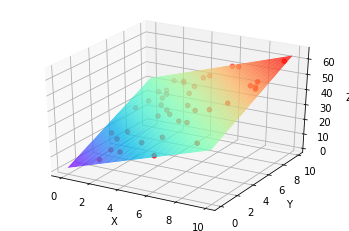

Reformat test feature to 1 -th order...
SSE:  [[9.54025454]]
2 -th order result: 
[[1.00000000e+00 9.63090000e+00 9.27542348e+01 6.44320000e+00
  6.20538149e+01 4.15148262e+01]
 [1.00000000e+00 5.21140000e+00 2.71586900e+01 8.11580000e+00
  4.22946801e+01 6.58662096e+01]
 [1.00000000e+00 4.88900000e+00 2.39023210e+01 3.50730000e+00
  1.71471897e+01 1.23011533e+01]
 [1.00000000e+00 6.79140000e+00 4.61231140e+01 8.75940000e+00
  5.94885892e+01 7.67270884e+01]
 [1.00000000e+00 3.67440000e+00 1.35012154e+01 6.22480000e+00
  2.28724051e+01 3.87481350e+01]
 [1.00000000e+00 3.77400000e-01 1.42430760e-01 2.07740000e+00
  7.84010760e-01 4.31559076e+00]
 [1.00000000e+00 9.13290000e+00 8.34098624e+01 4.70920000e+00
  4.30086527e+01 2.21765646e+01]
 [1.00000000e+00 9.87100000e-01 9.74366410e-01 8.44310000e+00
  8.33418401e+00 7.12859376e+01]
 [1.00000000e+00 3.35360000e+00 1.12466330e+01 2.25920000e+00
  7.57645312e+00 5.10398464e+00]
 [1.00000000e+00 1.36550000e+00 1.86459025e+00 2.27660000e+00
 

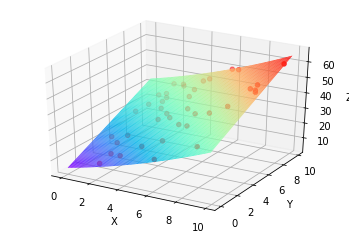

Reformat test feature to 2 -th order...
SSE:  [[0.18823484]]
3 -th order result: 
[[1.00000000e+00 9.63090000e+00 9.27542348e+01 8.93306760e+02
  6.44320000e+00 6.20538149e+01 5.97634086e+02 4.15148262e+01
  3.99825140e+02 2.67488328e+02]
 [1.00000000e+00 5.21140000e+00 2.71586900e+01 1.41534797e+02
  8.11580000e+00 4.22946801e+01 2.20414496e+02 6.58662096e+01
  3.43255165e+02 5.34556984e+02]
 [1.00000000e+00 4.88900000e+00 2.39023210e+01 1.16858447e+02
  3.50730000e+00 1.71471897e+01 8.38326104e+01 1.23011533e+01
  6.01403384e+01 4.31438349e+01]
 [1.00000000e+00 6.79140000e+00 4.61231140e+01 3.13240516e+02
  8.75940000e+00 5.94885892e+01 4.04010804e+02 7.67270884e+01
  5.21084348e+02 6.72083258e+02]
 [1.00000000e+00 3.67440000e+00 1.35012154e+01 4.96088657e+01
  6.22480000e+00 2.28724051e+01 8.40423654e+01 3.87481350e+01
  1.42376147e+02 2.41199391e+02]
 [1.00000000e+00 3.77400000e-01 1.42430760e-01 5.37533688e-02
  2.07740000e+00 7.84010760e-01 2.95885661e-01 4.31559076e+00
  1.62870

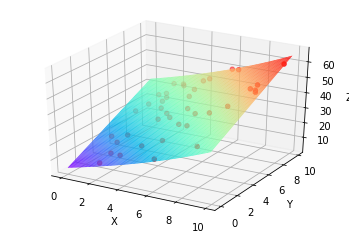

Reformat test feature to 3 -th order...
SSE:  [[0.25461015]]
4 -th order result: 
[[1.00000000e+00 9.63090000e+00 9.27542348e+01 8.93306760e+02
  8.60334808e+03 6.44320000e+00 6.20538149e+01 5.97634086e+02
  5.75575412e+03 4.15148262e+01 3.99825140e+02 3.85067594e+03
  2.67488328e+02 2.57615334e+03 1.72348080e+03]
 [1.00000000e+00 5.21140000e+00 2.71586900e+01 1.41534797e+02
  7.37594440e+02 8.11580000e+00 4.22946801e+01 2.20414496e+02
  1.14866810e+03 6.58662096e+01 3.43255165e+02 1.78883997e+03
  5.34556984e+02 2.78579027e+03 4.33835757e+03]
 [1.00000000e+00 4.88900000e+00 2.39023210e+01 1.16858447e+02
  5.71320949e+02 3.50730000e+00 1.71471897e+01 8.38326104e+01
  4.09857632e+02 1.23011533e+01 6.01403384e+01 2.94026115e+02
  4.31438349e+01 2.10930209e+02 1.51318372e+02]
 [1.00000000e+00 6.79140000e+00 4.61231140e+01 3.13240516e+02
  2.12734164e+03 8.75940000e+00 5.94885892e+01 4.04010804e+02
  2.74379898e+03 7.67270884e+01 5.21084348e+02 3.53889224e+03
  6.72083258e+02 4.56438624e+0

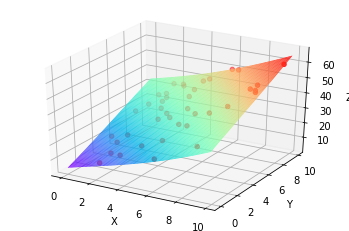

Reformat test feature to 4 -th order...
SSE:  [[0.34092782]]
5 -th order result: 
[[1.00000000e+00 9.63090000e+00 9.27542348e+01 8.93306760e+02
  8.60334808e+03 8.28579850e+04 6.44320000e+00 6.20538149e+01
  5.97634086e+02 5.75575412e+03 5.54330923e+04 4.15148262e+01
  3.99825140e+02 3.85067594e+03 3.70854749e+04 2.67488328e+02
  2.57615334e+03 2.48106752e+04 1.72348080e+03 1.65986712e+04
  1.11047315e+04]
 [1.00000000e+00 5.21140000e+00 2.71586900e+01 1.41534797e+02
  7.37594440e+02 3.84389967e+03 8.11580000e+00 4.22946801e+01
  2.20414496e+02 1.14866810e+03 5.98616896e+03 6.58662096e+01
  3.43255165e+02 1.78883997e+03 9.32236060e+03 5.34556984e+02
  2.78579027e+03 1.45178674e+04 4.33835757e+03 2.26089167e+04
  3.52092424e+04]
 [1.00000000e+00 4.88900000e+00 2.39023210e+01 1.16858447e+02
  5.71320949e+02 2.79318812e+03 3.50730000e+00 1.71471897e+01
  8.38326104e+01 4.09857632e+02 2.00379397e+03 1.23011533e+01
  6.01403384e+01 2.94026115e+02 1.43749367e+03 4.31438349e+01
  2.10930209e+

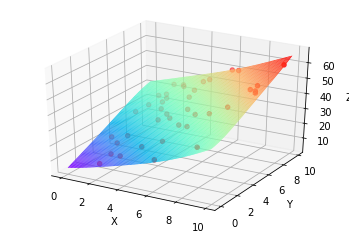

Reformat test feature to 5 -th order...
SSE:  [[0.39936141]]
6 -th order result: 
[[1.00000000e+00 9.63090000e+00 9.27542348e+01 ... 1.11047315e+04
  1.06948558e+05 7.15500058e+04]
 [1.00000000e+00 5.21140000e+00 2.71586900e+01 ... 3.52092424e+04
  1.83489446e+05 2.85751169e+05]
 [1.00000000e+00 4.88900000e+00 2.39023210e+01 ... 5.30718927e+02
  2.59468483e+03 1.86139049e+03]
 ...
 [1.00000000e+00 6.09870000e+00 3.71941417e+01 ... 2.23208321e+00
  1.36128059e+01 2.62091210e+00]
 [1.00000000e+00 8.59440000e+00 7.38637114e+01 ... 3.29196593e+02
  2.82924720e+03 1.04941290e+03]
 [1.00000000e+00 5.76720000e+00 3.32605958e+01 ... 3.37846980e+03
  1.94843111e+04 1.71578967e+04]]


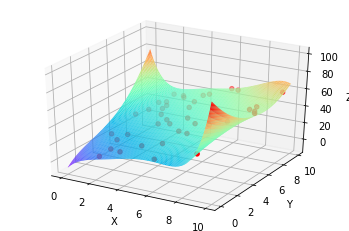

Reformat test feature to 6 -th order...
SSE:  [[68.79537983]]
7 -th order result: 
[[1.00000000e+00 9.63090000e+00 9.27542348e+01 ... 7.15500058e+04
  6.89090951e+05 4.61010998e+05]
 [1.00000000e+00 5.21140000e+00 2.71586900e+01 ... 2.85751169e+05
  1.48916364e+06 2.31909934e+06]
 [1.00000000e+00 4.88900000e+00 2.39023210e+01 ... 1.86139049e+03
  9.10033812e+03 6.52845488e+03]
 ...
 [1.00000000e+00 6.09870000e+00 3.71941417e+01 ... 2.62091210e+00
  1.59841566e+01 3.07747499e+00]
 [1.00000000e+00 8.59440000e+00 7.38637114e+01 ... 1.04941290e+03
  9.01907421e+03 3.34531844e+03]
 [1.00000000e+00 5.76720000e+00 3.32605958e+01 ... 1.71578967e+04
  9.89530221e+04 8.71380944e+04]]


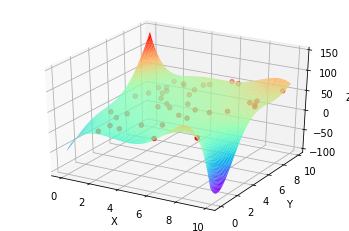

Reformat test feature to 7 -th order...
SSE:  [[1270.48704881]]


In [318]:
import numpy as np
import math
from matplotlib import pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D

class lr(object):
    
    def load_csv(self, path, delimiter, test_path):
        # load data
        print("loading train set...\n")
        data = np.loadtxt(path, dtype=np.str, delimiter=delimiter)
        
        # set feature from str to float64
        feature = np.array(data[:, :-1].astype(np.float64))
        label = np.array(data[:, -1]).astype(np.float64)
        print("loading test set...\n")
        test_data = np.loadtxt(test_path, dtype=np.str, delimiter=delimiter)
        # set feature from str to float64
        test_feature = np.array(test_data[:, :-1].astype(np.float64))
        test_label = np.array(test_data[:, -1].astype(np.float64))
        return feature, label, test_feature, test_label
    
    def toOrder(self, X, order):
        orderX = []
        for i in X:
            tmp = []
            for j in range(order+1):
                for k in range(order+1):
                    if (j+k<=order):
                        tmp.append(math.pow(i[0], j)*math.pow(i[1], k))
            orderX.append(tmp)
#         print(np.array(orderX))
        return np.array(orderX)
    
    def leastSquares(self, X, y, order): 
            # using the fact that \theta = (X^T X)^(-1)X^T y
            # set X_0 = 1
            orderX = self.toOrder(X, order)
#             parameter = np.dot(np.dot(np.matrix(np.dot(orderX.T, orderX)).I, orderX.T), y)
#             print(orderX.shape, y.shape) #(40 36) 40
#             print("xxt-1",np.linalg.pinv(orderX).shape) # (36, 40)
            parameter = np.dot(np.linalg.pinv(orderX) , y.reshape((40,1)))
#             print(parameter) #(36, 1)
            return orderX, y, parameter
    def show(self, feature, X, y, parameter, order):
#         print(parameter)
        order = order
        fig = plt.figure()  
#         ax = Axes3D(fig)
        ax = fig.add_subplot(111, projection='3d')
        # Generate regression surface
        x1 = np.arange(0, 10, 0.1)
        x2 = np.arange(0, 10, 0.1) 
        x1, x2 = np.meshgrid(x1, x2)
#         print(x1.shape) 100 100
        orderlist = []
#         print (np.array(list(zip(x1, x2))).shape) 100 2 100
#         orderlist.append(np.ones((100, 100)))
        for j in range(0, order+1):
            for k in range(0, order+1):
                if (j+k<=order):
                    orderlist.append(np.power(x1, j)*np.power(x2, k).T)
        
        orderlist = np.array(orderlist)
        z = np.dot(orderlist.T , parameter)
        z = z.reshape((100,100))
        # plot the surface
        ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='rainbow') 
        # plot the dot that document given.
        ax.scatter(feature[:, 0], feature[:, 1], y, c='r')
        ax.set_zlabel('Z')  # 坐标轴
        ax.set_ylabel('Y')
        ax.set_xlabel('X')
        plt.show()
    
    def evaluate(self, test_feature, test_label, parameter, order):
        print("Reformat test feature to", order, "-th order...")
        
        orderX = self.toOrder(test_feature, order)
        predicty = np.dot(orderX,parameter) #(40, 36) (40, 36)

        tmp = test_label.reshape((test_feature.shape[0], 1))-predicty
        SSE = np.dot(tmp.T,tmp)
        print("SSE: ", SSE)        
            
    def show2(self, feature, X, y, parameter, order):
        order = order
        fig = plt.figure()  
        ax = fig.add_subplot(111, projection='3d')
        # Generate regression surface
        x1 = np.arange(0, 10, 0.1)
        x2 = np.arange(0, 10, 0.1) 
        x1, x2 = np.meshgrid(x1, x2)
#         print(x1.shape) 100 100
#         orderlist = []
#         print (np.array(list(zip(x1, x2))).shape) 100 2 100
#         orderlist.append(np.ones((100, 100)))
#         for j in range(0, order+1):
#             for k in range(0, order+1):
#                 if (j+k<=order):
#                     orderlist.append(np.power(x1, j)*np.power(x2, k).T)
        
#         orderlist = np.array(orderlist)
#         print("++++++", orderlist.T.shape, parameter.T.shape)
#         z = np.dot(orderlist.T , parameter)
#         z = z.reshape((100,100))
        z = np.ones((len(x1), len(x1)))
        for i in range(len(x1)):
            for j in range(len(x2)):
                t = [[x1[i, j], x2[i, j]]]
                ox = self.toOrder(t, order)
                value = np.dot(ox, parameter)
                z[i, j] = value
                
        # plot the surface
        ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='rainbow') 
        # plot the dot that document given.
        ax.scatter(feature[:, 0], feature[:, 1], y, c='r')
        ax.set_zlabel('Z')  # 坐标轴
        ax.set_ylabel('Y')
        ax.set_xlabel('X')
        plt.show()
        
    def run(self):
        feature, label, test_feature, test_label = self.load_csv("project1.csv", ",", "project1_test.csv")
#         print(test_feature.shape)
        for i in range(1, 8):
            print(i, "-th order result: ")
            orderX, y, parameter = self.leastSquares(feature, label, i)
            self.show2(feature, orderX, y, parameter, i)
            self.evaluate(test_feature, test_label, parameter, i)
#             self.toOrder(feature, i)
        
        
lr = lr()
lr.run()

### Logistic Regression

In [495]:
import numpy as np
class logisticRegression(object):
    def __init__(self, train, test):
        self.train = train
        self.test = test
    
    # factorize
    def tointclass(self, label):
        intclass = np.array(np.unique(label, return_inverse=True)[1]).astype(np.float64)
        return intclass
    
    def split(self, data):
        feature = [feat[0] for feat in data]
        label = self.tointclass([lbl[1] for lbl in data])
        return np.array(feature), np.array(label)
    
    # use log likelihood 
    def SGD(self, X, y, step, itertimes):
        m, n = X.shape
        theta = np.ones((X.shape[1]+1, 1))
#         print("Init theta:", theta)
        x0 = np.ones((X.shape[0], 1))
        X = np.c_[X, x0]
        iter_cnt = 0
        while (iter_cnt < itertimes):
            # Random select data
            for rand in range(X.shape[0]):
                py = y[rand]
                h = self.sigmoid(np.dot(theta.T, X[rand]))
#                 print(theta.shape, X[rand].shape)
                theta = theta + step * (py - h) * X[rand].reshape((4, 1))
            iter_cnt += 1
#         print("theta:", theta.shape)
        return theta
    
    # use log likelihood 
    def BGD(self, X, y, step, itertimes):
        m, n = X.shape
        theta = np.ones((X.shape[1]+1, 1))
#         print("Init theta:", theta)
        x0 = np.ones((X.shape[0], 1))
        X = np.c_[X, x0]
        iter_cnt = 0
        while (iter_cnt < itertimes):

            # sum of gradiant
            allsum = np.zeros((4,))
            for i in range(X.shape[0]):
                allsum = allsum + (y[i]-self.sigmoid(np.dot(theta.T, X[i]))) * X[i]
#             print(allsum.shape)
            
            theta = theta + step * allsum.reshape((4, 1))
            
            
#             print("Iter time ", iter_cnt)
#             print(iter_cnt, "theta:", theta) #theta 4*1
            
            iter_cnt += 1
            print(theta.reshape((1, 4)))
        
        return theta
    
    def predict(self, test_X, test_y, theta):
        x0 = np.ones((test_X.shape[0], 1))
        test_X = np.c_[test_X, x0]
        x_theta = np.dot(theta.T, test_X.T)
        pre = self.sigmoid(x_theta)
#         print(pre)
        pre[pre>0.5] = 1
        pre[pre<=0.5] = 0
#         print(pre)
        return pre
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def run(self):
        train_X, train_y = self.split(self.train)
        test_X, test_y = self.split(self.test)
        theta = self.SGD(train_X, train_y, 0.01, 200)
        pre = self.predict(test_X, test_y, theta)
        for i in range(test_X.shape[0]):
            if pre[0, i] == 1:
                print(test_X[i], "W")
            else:
                print(test_X[i], "M")
    
train = [[[170, 57, 32], 'W'], 
         [[192, 95, 28], 'M'], 
         [[150, 45, 30], 'W'], 
         [[170, 65, 29], 'M'], 
         [[175, 78, 35], 'M'], 
         [[185, 90, 32], 'M'], 
         [[170, 65, 28], 'W'], 
         [[155, 48, 31], 'W'], 
         [[160, 55, 30], 'W'], 
         [[182, 80, 30], 'M'], 
         [[175, 69, 28], 'W'], 
         [[180, 80, 27], 'M'], 
         [[160, 50, 31], 'W'],
         [[175, 72, 30], 'M']]
    
test = [[[155, 40, 35], 'W'], 
        [[170, 70, 32], 'M'], 
        [[175, 70, 35], 'W'], 
        [[180, 90, 20], 'M']]

logisticRegression = logisticRegression(train, test)
logisticRegression.run()

[155  40  35] W
[170  70  32] M
[175  70  35] W
[180  90  20] M


In [496]:
# GDA
import matplotlib.pyplot as plt
import numpy as np

class GDA(object):
    def __init__(self, train, test):
        self.train = train
        self.test = test
    
    # factorize
    def tointclass(self, label):
        intclass = np.array(np.unique(label, return_inverse=True)[1]).astype(np.float64)
        return intclass
    
    def split(self, data):
        feature = [feat[0] for feat in data]
        label = self.tointclass([lbl[1] for lbl in data])
        return np.array(feature), np.array(label)
    
    # calculate data's cov 
    def calcCov(self, X, y):
        m, n = X.shape
        data = np.c_[X, y.reshape(y.shape[0], 1)]
        class0_data = data[data[:, 3]==0]
        class1_data = data[data[:, 3]==1]
        u0 = np.mean(class0_data[:, :3], axis=0)
        u1 = np.mean(class1_data[:, :3], axis=0)
        class0_sub_u0 = class0_data[:, :3] - u0
        class1_sub_u1 = class1_data[:, :3] - u1
        
        x_sub_u = np.concatenate([class0_sub_u0,class1_sub_u1])
#         print (class0_sub_u0.shape, class1_sub_u1.shape, x_sub_u.shape) # (7, 3) (7, 3) (14, 3)
        x_sub_u=np.mat(x_sub_u)
        # cov
        sigma=(1.0/(m-2))*(x_sub_u.T*x_sub_u)
        phi=(1.0/m)*class1_data.shape[0]
#         print(phi, u0, u1, sigma)
        return phi, u0, u1, sigma, class0_data, class1_data
    
    def estimateProbability(self, X, phi, u0, u1, sigma):
        predict = []
        for i in X:
            # The probability of class 0
#             py0 = (1-phi)
#             pxy0_1 = (1/(np.power(2*3.14, m/2)*np.power(np.abs(sigma), 1/2)))
            # NNNNNNNot sure (np.dot((i-u0), np.power(sigma, -1))
#             pxy0_2 = np.exp((-1/2)*np.dot(np.dot((i-u0), np.power(sigma, -1)), (i-u0)))
#             print(py0,pxy0_1,pxy0_2)
#             pxy0 = py0 * pxy0_1 * pxy0_2
            # The probability of class 0
#             py1 = phi
#             pxy1_1 = (1/(np.power(2*3.14, m/2)*np.power(np.abs(sigma), 1/2)))
            # NNNNNNNot sure (np.dot((i-u0), np.power(sigma, -1))
#             pxy1_2 = np.exp((-1/2)*np.dot(np.dot((i-u1), np.power(sigma, -1)), (i-u1)))
#             pxy1 = py1 * pxy0_1 * pxy0_2

            # The probability of class 0
#             print(i.shape, np.dot(np.power(sigma, -1), (u0-u1)).shape)
            logp0dividep1_1 = np.dot(    np.dot(np.linalg.inv(sigma), (u0-u1))    , i)
            logp0dividep1_2 = -(1/2)*np.dot(   np.dot((u0+u1), np.linalg.inv(sigma))    , (u0-u1))
        
#             print("logp0dividep1_1: ", logp0dividep1_1, "logp0dividep1_2: ", logp0dividep1_2)
        
            logp0dividep1 = logp0dividep1_1 + logp0dividep1_2
            # The probability of class 1
            if (logp0dividep1 > 0):
                print("0", "M")
            else:
                print("1", "W")
                
#         print(np.linalg.inv(sigma).shape, (u0-u1).shape, "*=======", -(1/2), np.dot(   np.dot((u0+u1), np.linalg.inv(sigma))    , (u0-u1)).shape)
        print("y = ", np.dot(np.linalg.inv(sigma), (u0-u1)), "* x + ", -(1/2)*np.dot(   np.dot((u0+u1), np.linalg.inv(sigma))    , (u0-u1)))
        return np.dot(np.linalg.inv(sigma), (u0-u1)), -(1/2)*np.dot(   np.dot((u0+u1), np.linalg.inv(sigma))    , (u0-u1))
            
            # The probability of class 1
            
    def generateData(self, u0, u1, sigma):
        # use height and weight
        
        # generate two cluster data of Gaussian distributions
        # class 0
        u0 = u0[:2]
        cov = mat(sigma[:2, :2])
        x0 = random.multivariate_normal(u0,cov,50).T   #The first class point which labael equal 0
        y0 = zeros(shape(x0)[1])
        # class 1
        u1 = u1[:2]
        x1 = random.multivariate_normal(u1,cov,50).T   #The first class point which labael equal 0
        y1 = np.ones(shape(x1)[1])
        
#         print(x0, y0, x1, y1)
        return x0, y0, x1, y1

    def show(self, x0, y0, x1, y1, class0_data, class1_data, phi, u0, u1, sigma, a, b):
#         print("x0==", x0[0], x0[1])
#         print("x1==", x1[0], x1[1])
#         print("class0_data==", class0_data[:, 0], class0_data[:, 1])
#         print("class1_data==", class1_data[:, 0], class1_data[:, 1])
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.set_title('Compare Generated data and Origin data')
        plt.xlabel('X')
        plt.ylabel('Y')
        ax1.scatter(x = x0[0], y = x0[1], color = 'red', marker = '+')
        ax1.scatter(x = class0_data[:, 0], y = class0_data[:, 1], color = 'blue', marker = '*')
        ax1.scatter(x = x1[0], y = x1[1], color = 'yellow', marker = '+')
        ax1.scatter(x = class1_data[:, 0], y = class1_data[:, 1], color = 'green', marker = '*')
        plt.legend('0o1i')
        
#         x1 = np.arange(50, 90, 4)
#         x2 = np.arange(150, 190, 4)
#         x3 = np.arange(20, 40, 2)
# #         print(x1, x2)
#         x = np.c_[x1, x2]
#         x = np.c_[x, x3]
#         print(np.dot(x, np.linalg.inv(sigma)).shape, u0.T.shape)
#         print(np.dot(np.dot(x, np.linalg.inv(sigma)), u0.T))
#         print(u0.shape, linalg.inv(sigma).shape, u0.T.shape)
#         print((1/2)*np.dot(np.dot(u0[:2],linalg.inv(sigma[:2, :2])), u0[:2].T)+np.log(1/2))
#         y = np.dot(x, a.T) + b
    
#         y = np.dot(np.dot(x[:, :2], np.linalg.inv(sigma[:2, :2])), u0[:2].T) - (1/2)*np.dot(np.dot(u0[:2],linalg.inv(sigma[:2, :2])), u0[:2].T)+np.log(1/2)
        
#         y = np.dot(np.dot(x, np.linalg.inv(sigma)), u0.T) - (1/2)*np.dot(np.dot(u0,linalg.inv(sigma)), u0.T)+np.log(1/2)
#         ax1.plot(x2, y, 'k')
        
        plt.show()
         



    def run(self):
        train_X, train_y = self.split(self.train)
        test_X, test_y = self.split(self.test)
#         print(test_y) #["W":"1", "M":"0"]
        phi, u0, u1, sigma, class0_data, class1_data = self.calcCov(train_X, train_y)
        a, b = self.estimateProbability(test_X, phi, u0, u1, sigma)
        x0, y0, x1, y1 = self.generateData(u0, u1, sigma)
        self.show(x0, y0, x1, y1, class0_data, class1_data, phi, u0, u1, sigma, a, b)
        
train = [[[170, 57, 32], 'W'], 
         [[192, 95, 28], 'M'], 
         [[150, 45, 30], 'W'], 
         [[170, 65, 29], 'M'], 
         [[175, 78, 35], 'M'], 
         [[185, 90, 32], 'M'], 
         [[170, 65, 28], 'W'], 
         [[155, 48, 31], 'W'], 
         [[160, 55, 30], 'W'], 
         [[182, 80, 30], 'M'], 
         [[175, 69, 28], 'W'], 
         [[180, 80, 27], 'M'], 
         [[160, 50, 31], 'W'],
         [[175, 72, 30], 'M']]
    
test = [[[155, 40, 35], 'W'], 
        [[170, 70, 32], 'M'], 
        [[175, 70, 35], 'W'], 
        [[180, 90, 20], 'M']]

GDA = GDA(train, test)
GDA.run()





1 W
0 M
0 M
0 M
y =  [[-0.30191762  0.52824321  0.25779567]] * x +  [[8.17611312]]


AttributeError: 'numpy.ndarray' object has no attribute 'shapex0'

In [455]:
print(np.log(150))

5.0106352940962555


In [ ]:
# SVD
import numpy as np


# 利用SVD 对 手写字体 数据进行压缩
# 原始数据为 32*32 =1024
# 而利用奇异值分解 得到三个矩阵 利用2个奇异值就可以比较完整的 重构原来的矩阵
# 即奇异值分解压缩后 所用数据为 32*2 + 32*2 + 2 = 130
# 将近十倍的压缩率
def imgCompress(numSV=3, thresh=0.8):
    myl = []
    for line in open('0_5.txt').readlines(): # 每一行
        newRow = []
        for i in range(32):
            newRow.append(int(line[i]))
        myl.append(newRow)
    myMat = np.mat(myl) #原始数据集矩阵
    print "****原始矩阵******"
    printMat(myMat, thresh)#二值化打印数据
    print '大小：'
    print  shape(myMat)
    U,Sigma,VT = la.svd(myMat)# 奇异值分解
    SigRecon = mat(zeros((numSV, numSV)))# 简化的奇异值对角矩阵
    for k in range(numSV):               
        SigRecon[k,k] = Sigma[k]          # 替换对角上的元素
    reconMat = U[:,:numSV]*SigRecon*VT[:numSV,:] 
    # 简化后的 奇异值对角矩阵 以及截断的 U, VT 逆变换得到重构后的矩阵
    print "****使用 %d 个奇异值重构后的矩阵******" % numSV
    printMat(reconMat, thresh)
    print '大小：'


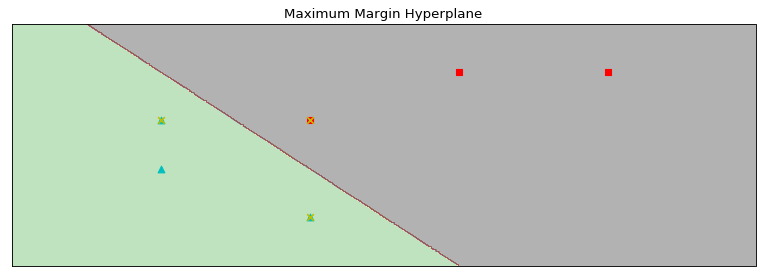

In [156]:
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

def plot_hyperplane(clf, X, y, 
                    h=0.01, 
                    draw_sv=True, 
                    title='hyperplane'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # hyperplane
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='Accent', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    # draw support vector
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

        
X = np.array([[1, 2],[2, 3],[2, 1],[3, 4],[1, 3],[4, 4]])
y = [-1, 1, -1, 1, -1, 1]
clf = svm.SVC(C=10, kernel='linear')
clf.fit(X, y)

plt.figure(figsize=(12, 4), dpi=80)

plot_hyperplane(clf, X, y, h=0.01, 
                title='Maximum Margin Hyperplane')


In [147]:
import csv
import numpy as np

def calcEntropy(y):
    Entropy = 0
    numOfdata = y.shape[0]
    eachClass = dict()
    for i in y:
        eachClass.setdefault(i, 0)
        eachClass[i] += 1
    for each in eachClass.values():
#         print("-", each, "/", numOfdata, "*log(", each, "/", numOfdata, ") = ", -(each/numOfdata)*np.log(each/numOfdata))
        Entropy += -(each/numOfdata)*np.log(each/numOfdata)
#     print(Entropy)
    return Entropy
    
def calcConditionEntropy(X, y):
    Entropy = calcEntropy(y)
#     ConditionEntropy = 0
    numOfdata = y.shape[0]
    eachClass = dict()
    maxInfo = 0
    maxInfoFeature = 0
    # each feature
    for i in range(X.shape[1]):
#         print(i, "-th feature")
        eachClass = dict()
        ConditionEntropy = 0
        # each feature each class's count
        # eachClass {feature class: {data class1: num1, data class2: num2 ...}}
        for idx, j in enumerate(X[:, i]):
            eachClass.setdefault(j, {})
            eachClass[j].setdefault(y[idx], 0)
            eachClass[j][y[idx]] += 1
        
        for each in eachClass.keys():
            count = 0
            for classcnt in eachClass[each].keys():
                count += eachClass[each][classcnt]
            eachClass[each]["sum"] = count   
            
        # each feature class
        for p in eachClass.keys():
            ratio = eachClass[p]["sum"]/numOfdata
            for q in eachClass[p].keys():
                # feature class / numOfdata
                if q != "sum":
#                     print("class:", q)
#                     print("-", eachClass[p]["sum"], "/", numOfdata, "*", eachClass[p][q] ,"/", eachClass[p]["sum"], "log(",  eachClass[p][q], "/", eachClass[p]["sum"], ")", -ratio*(eachClass[p][q]/eachClass[p]["sum"])*np.log(eachClass[p][q]/eachClass[p]["sum"]))
                    ConditionEntropy += -ratio*(eachClass[p][q]/eachClass[p]["sum"])*np.log(eachClass[p][q]/eachClass[p]["sum"])
#         print("ConditionEntropy: ", ConditionEntropy)
        InformationGain = Entropy - ConditionEntropy
#         print("Information Gain:" , InformationGain)
        if (InformationGain > maxInfo):
            maxInfo = InformationGain
            maxInfoFeature = i
    return maxInfoFeature

def splitDataSet(X, bestFeatureIdx, cls):
    slt = [i for i in range(X.shape[1])]
    del(slt[bestFeatureIdx])
    idx = np.where(X[:, bestFeatureIdx]==cls)

    subsetX = X[:, slt]
    subsetX = subsetX[idx[0], :]
    subsety = y[idx[0]]
    return subsetX, subsety
    

def generateDecitionTree(X, y, labelList):
    if (len(set(y)) == 1):
        return y[0]
    if (X.shape[1] == 1):
        unique, counts = np.unique(y, return_counts=True)
        tmp = dict(zip(unique, counts))
        label, cnt = -1, -1
        for key, value in tmp.items():
            if (value > cnt):
                cnt = value
                label = key
        return label
    bestFeatureIdx = calcConditionEntropy(X, y)
    bestFeature = labelList[bestFeatureIdx]
    # store in dict
    Tree = {bestFeature:{}}
    labelList = np.delete(labelList, bestFeatureIdx)
    featureData = X[:, bestFeatureIdx]
    for cls in set(featureData):
        subLabels = labelList
        nX, ny = splitDataSet(X, bestFeatureIdx, cls)
        Tree[bestFeature][cls]=generateDecitionTree(nX, ny, subLabels)
    return Tree

def classify(X, y, Tree, labelList):
    cnt = 0
    for i in range(X.shape[0]):
        testX = X[i]
        testy = y[i]
        predict = -1
        tmpTree = Tree
        while type(tmpTree) == dict:
            feat = list(tmpTree.keys())[0]
            feat_idx = labelList.index(feat)
            result = tmpTree[feat][testX[feat_idx]]
            if (type(result) == dict):
                tmpTree = result
            else:
                predict = result
                tmpTree = -1
        if (predict == testy):
            cnt += 1
    print("Accuracy: ", cnt/X.shape[0])

with open('MushroomTrain.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    data = np.array(list(reader))
    y = data[:, 0]
    X = data[:, 1:]
labelList = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']

# use all the feature
Tree = generateDecitionTree(X, y, labelList)

# delete feature 'odor'
# X = X[:, :-1]
# labelList = labelList[:-1]
# Tree = generateDecitionTree(X, y, labelList)

print("classify in train set: ")
classify(X, y, Tree, labelList)

with open('MushroomTest.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    data = np.array(list(reader))
    y = data[:, 0]
    X = data[:, 1:]
labelList = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']

print("classify in test set: ")
classify(X, y, Tree, labelList)


classify in train set: 
Accuracy:  1.0
classify in test set: 
Accuracy:  1.0
